## Data Analysis on Cars.csv

In [1]:
#import libraries
import pandas as pd
import altair as alt
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import file and inspect basic data
path = 'https://raw.githubusercontent.com/timofey2001/TripleTen-SDT-project/main/vehicles_us.csv'
cars = pd.read_csv(path)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
#preview the dataframe
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [12]:
#check for missing values
missing_values = cars.isnull().sum()
missing_values

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [37]:
#fill missing values with 0, assuming missing means the vehicle does not have 4WD. We will assume this purely for simplicity
cars['is_4wd'].fillna(0, inplace=True)
cars['is_4wd'] = cars['is_4wd'].astype(bool)

#fill missing 'model_year' with median
cars['model_year'].fillna(cars['model_year'].median(), inplace=True)

#fill with median number of cylinders by vehicle type
cars['cylinders'] = cars.groupby('type')['cylinders'].transform(lambda x: x.fillna(x.median()))

#fill missing 'odometer' with mean
cars['odometer'].fillna(cars['odometer'].mean(), inplace=True)

#fill missing paint colors with unknown
cars['paint_color'].fillna('Unknown', inplace=True)

cars.sample(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
37742,25995,2015.0,ford f-150,excellent,6.0,gas,73000.000000,automatic,truck,Unknown,True,2018-06-25,16
45607,23995,2017.0,honda pilot,excellent,6.0,gas,47000.000000,automatic,SUV,white,False,2018-07-05,22
35642,17950,2014.0,ford f-150,excellent,8.0,gas,138452.000000,automatic,pickup,white,True,2018-09-19,38
10958,9999,2017.0,ford focus se,excellent,4.0,gas,17000.000000,automatic,sedan,Unknown,False,2018-09-18,13
9616,19750,2012.0,bmw x5,excellent,6.0,diesel,45760.000000,automatic,SUV,black,True,2018-05-05,88
45164,4995,2006.0,toyota corolla,excellent,4.0,gas,121506.000000,automatic,sedan,Unknown,False,2019-01-04,38
18420,21900,2016.0,nissan frontier crew cab sv,good,6.0,gas,4998.000000,other,pickup,white,False,2018-06-09,38
47442,32990,2016.0,ford f-250 sd,good,8.0,gas,5031.000000,automatic,truck,black,True,2018-12-18,23
32815,8390,2013.0,hyundai elantra,excellent,4.0,gas,76625.000000,automatic,sedan,red,False,2018-10-29,30
12271,7995,2008.0,honda odyssey,excellent,6.0,gas,99630.000000,automatic,mini-van,blue,False,2018-05-21,10


Now lets create a graph that helps us visualize the distributions of columns using a histplot and the subplot method in pyplot

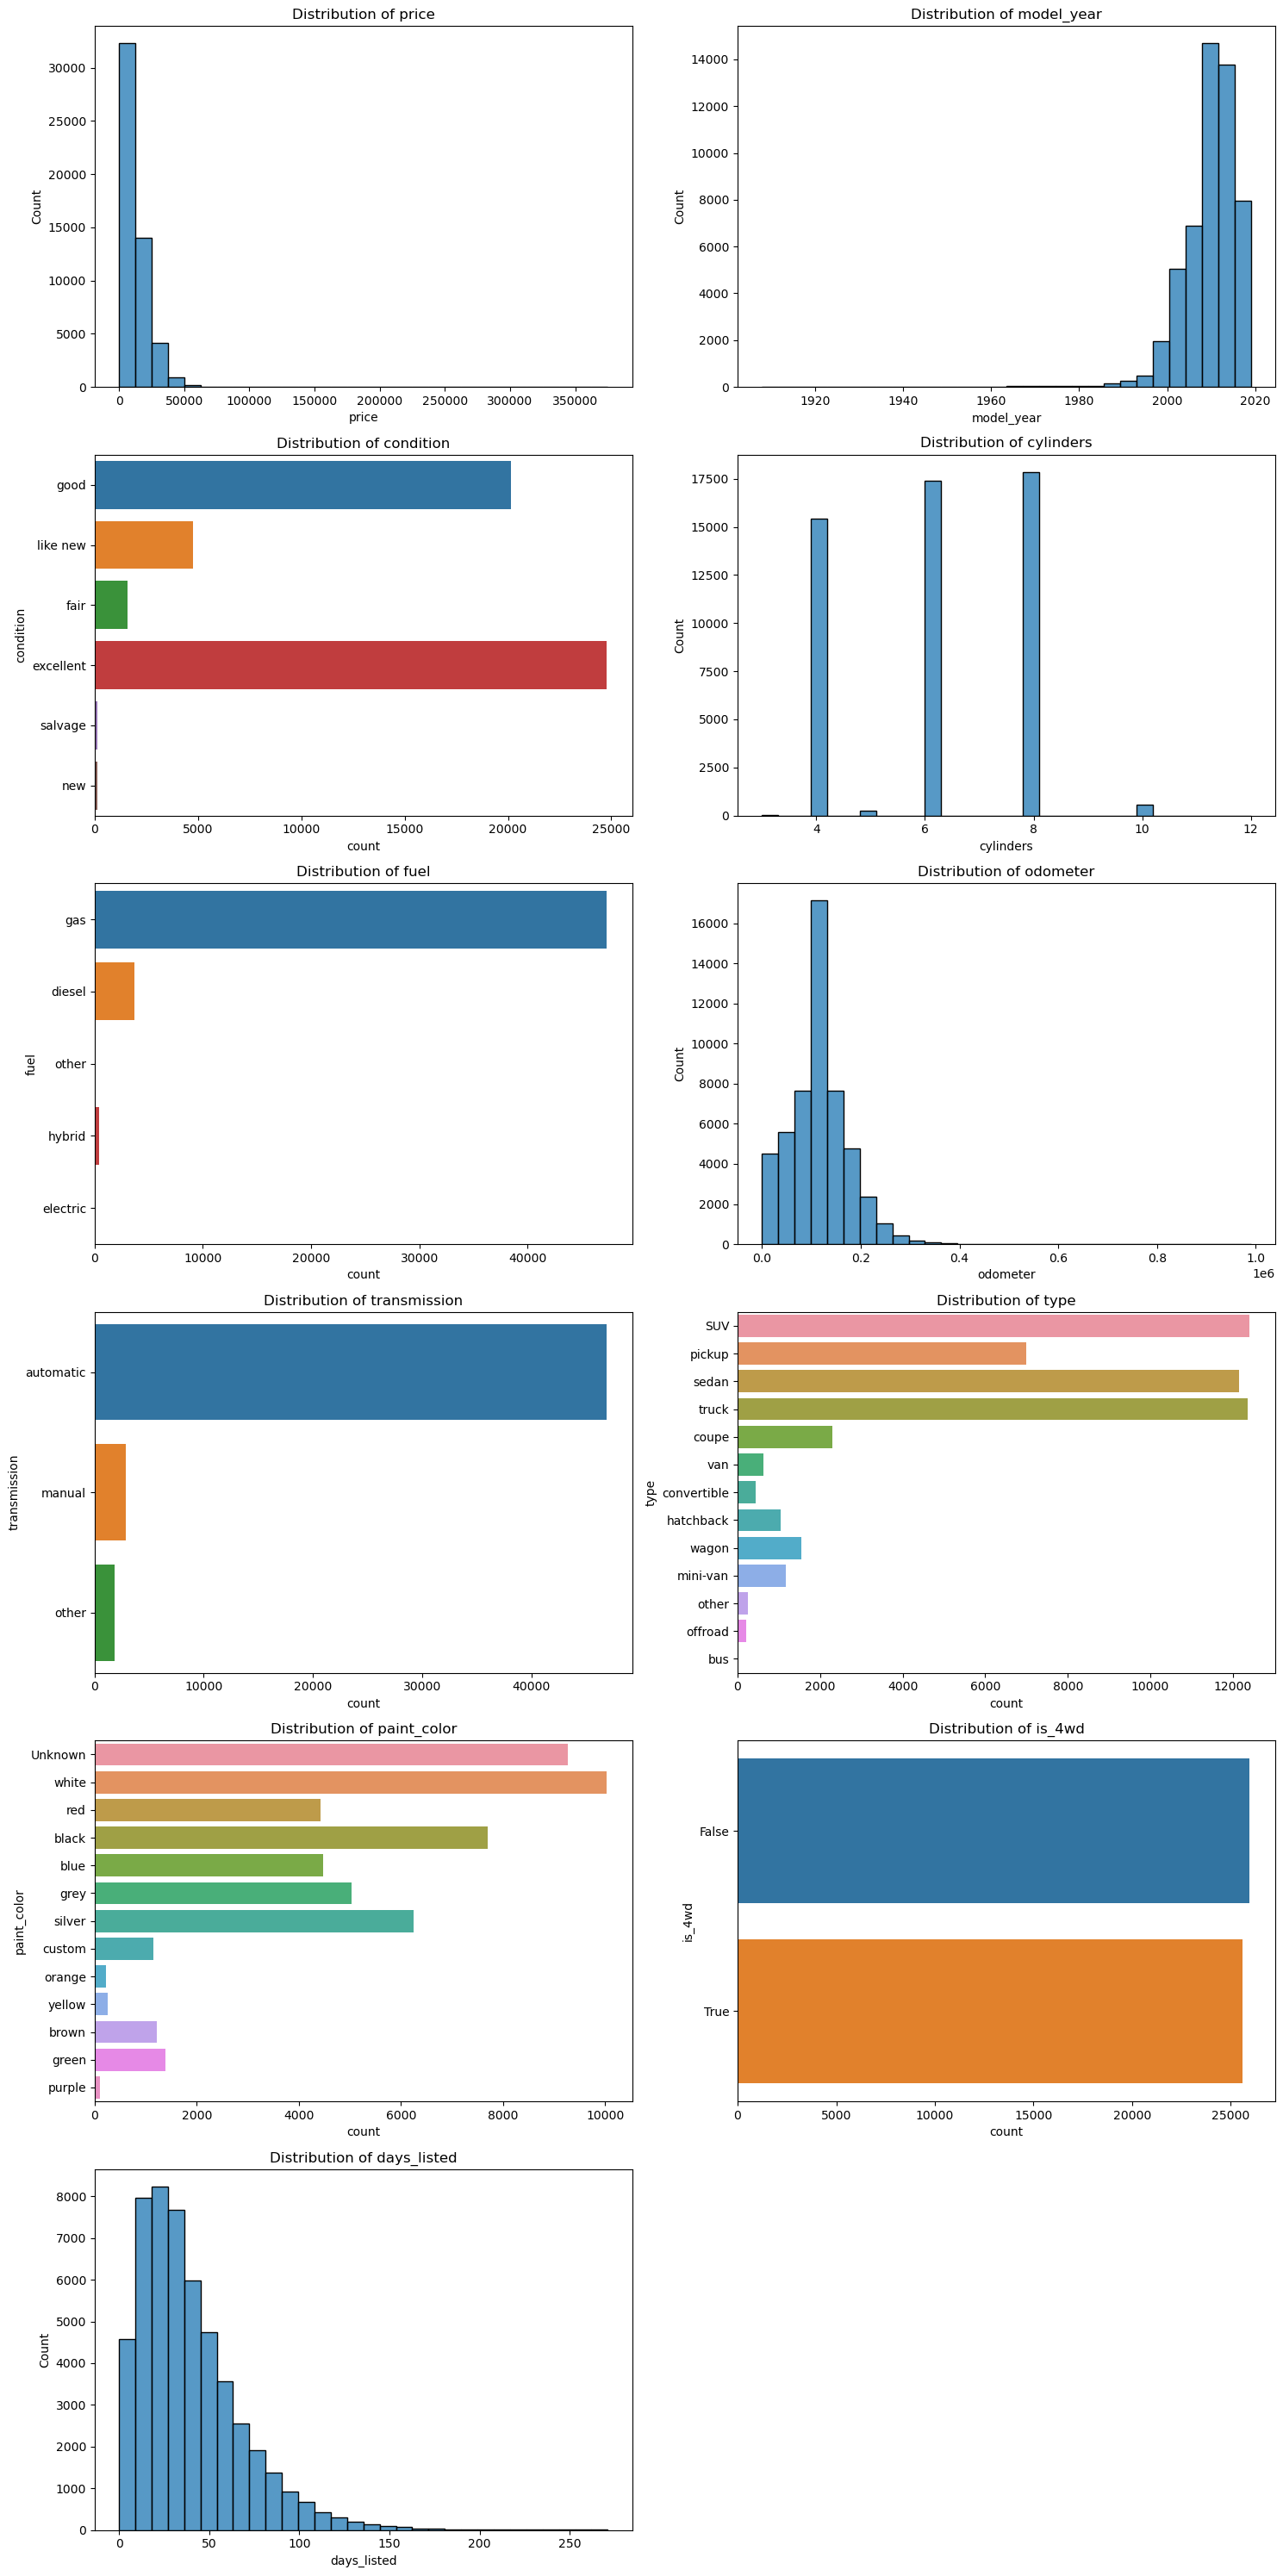

In [30]:
all_columns = [col for col in cars.columns if col not in ['date_posted', 'model']]

num_rows = (len(all_columns) + 1) // 2

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(all_columns, 1):
    plt.subplot(num_rows, 2, i)
    if cars[col].dtype in ['int64', 'float64']:
        sns.histplot(cars[col].dropna(), kde=False, bins=30)
    else:
        sns.countplot(y=col, data=cars)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Now lets do some more advanced comparisons, First lets graph the relationship between condition and price. We will use a box plot.

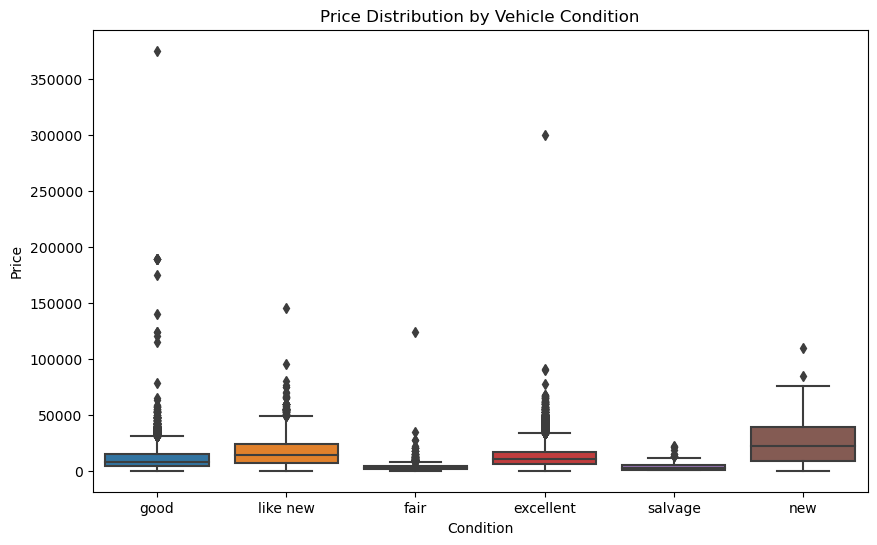

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=cars)
plt.title('Price Distribution by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

Given this grpah, we can conclude that vehicles in the new condition tend to sell for higher prices and have fewer outliers. The "good" and "like new" condition vehicles have alot of outliers sugessting stats that are not ploted like rarity and luxury status.

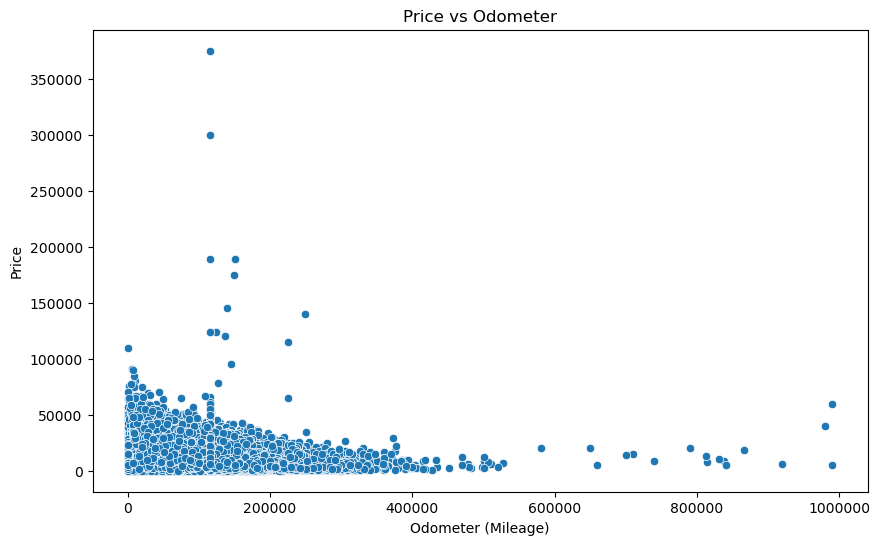

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=cars)
plt.title('Price vs Odometer')
plt.xlabel('Odometer (Mileage)')
plt.ylabel('Price')

plt.ticklabel_format(style='plain', axis='x')

plt.show()

This scatter plot is quite straight forward, most vehicles sell with under 400,000 miles and for less than $50,000.